# Assignment 1.2

### With the dataset you choose, perform the following steps:

### Write a summary of the data and identify at least 2 questions to explore visually
### Create a histogram/bar graph
### Create a boxplot
### Create a bivariate plot
### Create additional viz's that will help answer the questions
### Summarize results and make conclusion

In [1]:
# Import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import data from https://archive-beta.ics.uci.edu/ml/datasets/car+evaluation

#Taking a look at the .names file for more information about the variables and attributes

with open('car.names') as f:
    print(f.read())
    
raw_df = pd.read_csv('car.data')

1. Title: Car Evaluation Database

2. Sources:
   (a) Creator: Marko Bohanec
   (b) Donors: Marko Bohanec   (marko.bohanec@ijs.si)
               Blaz Zupan      (blaz.zupan@ijs.si)
   (c) Date: June, 1997

3. Past Usage:

   The hierarchical decision model, from which this dataset is
   derived, was first presented in 

   M. Bohanec and V. Rajkovic: Knowledge acquisition and explanation for
   multi-attribute decision making. In 8th Intl Workshop on Expert
   Systems and their Applications, Avignon, France. pages 59-78, 1988.

   Within machine-learning, this dataset was used for the evaluation
   of HINT (Hierarchy INduction Tool), which was proved to be able to
   completely reconstruct the original hierarchical model. This,
   together with a comparison with C4.5, is presented in

   B. Zupan, M. Bohanec, I. Bratko, J. Demsar: Machine learning by
   function decomposition. ICML-97, Nashville, TN. 1997 (to appear)

4. Relevant Information Paragraph:

   Car Evaluation Database was 

In [3]:
# Adding in the column names and taking a look

raw_df.columns = ['buying','maint','doors','persons','lug_boot','safety','class']
raw_df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [4]:
# Checking data types

raw_df.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object

In [5]:
# adjusting the datatypes for the numerical columns and removing errors

raw_df['doors'] = raw_df['doors'].str.replace('5more', '5').astype(int)
raw_df['doors'] = raw_df['doors'].astype(int)
raw_df['persons'] = raw_df['persons'].str.replace('more','5').astype(int)
raw_df['persons'] = raw_df['persons'].astype(int)

In [6]:
print(raw_df.dtypes)

buying      object
maint       object
doors        int32
persons      int32
lug_boot    object
safety      object
class       object
dtype: object


In [7]:
# Checking for NaN

raw_df.isnull().values.any()

False

In [8]:
# Create two dataframes, one for records where the class is unacceptable and one for all other classes (acceptable and better)

unacc_df = raw_df[raw_df['class'] == 'unacc']
acc_df = raw_df[raw_df['class'] != 'unacc']

### Write a summary of the data and identify at least 2 questions to explore visually

#### This data is a compilation of vehicle attributes that have been aggregated to classify what vehicles may be deemed unacceptable, acceptable, good, or very good. This is based off of the buying price, cost of maintenance, number of doors, number of people that it can hold, size of the trunk (or boot), and estimated safety of the car. 

#### What I'd like to learn from this dataset is how much the 'safety' rating impacts the overall class value and if a higher price equates to a higher class value.

### Create a histogram/bar graph

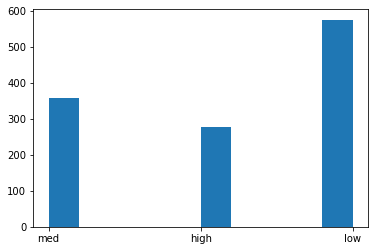

In [9]:
plt.hist(unacc_df['safety'])
plt.show()

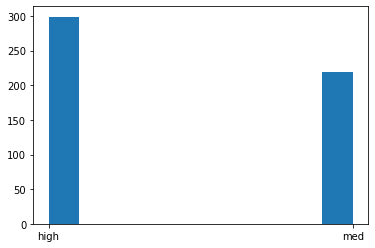

In [10]:
plt.hist(acc_df['safety'])
plt.show()

### Create a boxplot

<AxesSubplot:>

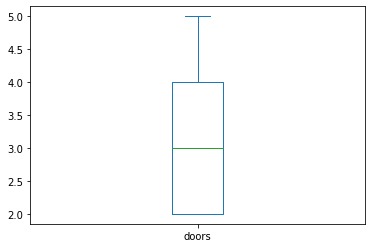

In [11]:
unacc_df['doors'].plot(kind='box')

<AxesSubplot:>

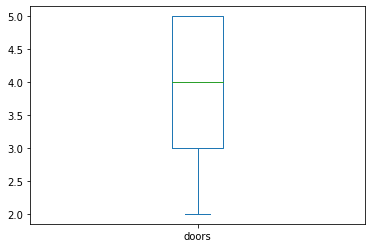

In [12]:
acc_df['doors'].plot(kind='box')

### Create a bivariate plot

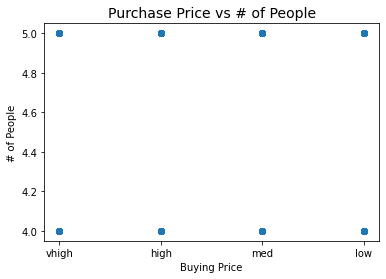

In [13]:
plt.scatter(acc_df['buying'],acc_df['persons'])
plt.title('Purchase Price vs # of People', fontsize=14)
plt.xlabel('Buying Price', fontsize=10)
plt.ylabel('# of People', fontsize=10)
plt.show()

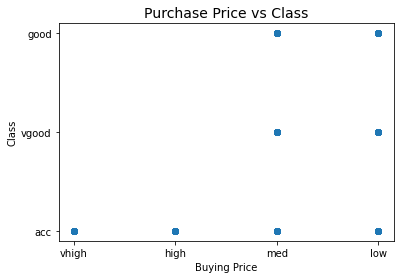

In [14]:
plt.scatter(acc_df['buying'],acc_df['class'])
plt.title('Purchase Price vs Class', fontsize=14)
plt.xlabel('Buying Price', fontsize=10)
plt.ylabel('Class', fontsize=10)
plt.show()

### Summarize results and make conclusion

#### Splitting the records into unacceptable vs all acceptable classes helped shine a bit of light on the data. We can see that in the acceptable & up records that none of
#### the safety ratings are below 'medium' whereas in the unacceptable dataframe the majority of records were 'low'. The histogram helped identify this difference. This tells me
#### that safety ratings likely have a heavy weighting on class as cars with a 'low' safety rating were not considered acceptable by any means.
#### In the boxplots, we see that the median number of doors for unacceptable cars is 3, with the median number of doors for acceptable cars is 4. Unacceptable vehicles with 5+
#### doors are definitely an outlier. In the scatterplots, we can see that the acceptable vehicles are any of the purchasing prices, but very good and good vehicles are only medium or low 
#### price points.